1️⃣Load & Inspect the Data

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/quantum_data.csv")

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36450 entries, 0 to 36449
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   circuit_id        36450 non-null  int64  
 1   num_qubits        36450 non-null  int64  
 2   depth             36450 non-null  int64  
 3   depth_multiplier  36450 non-null  int64  
 4   entanglement      36450 non-null  object 
 5   noise_type        36450 non-null  object 
 6   error_rate        36450 non-null  float64
 7   observable_name   36450 non-null  object 
 8   x_noisy           36450 non-null  float64
 9   x_ideal           36450 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.8+ MB


In [ ]:
# First rows
df.head()


,circuit_id,num_qubits,depth,depth_multiplier,entanglement,noise_type,error_rate,observable_name,x_noisy,x_ideal
0,0,4,2,1,linear,amplitude_damping,0.001,Z0,0.015463,0.014606
1,0,4,2,1,linear,amplitude_damping,0.001,Z1,-0.014410,-0.015575
2,0,4,2,1,linear,amplitude_damping,0.001,Z2,0.026975,0.026196
3,0,4,2,1,linear,amplitude_damping,0.001,Z3,-0.278298,-0.278889
4,0,4,2,1,linear,amplitude_damping,0.001,Z0Z1,-0.317080,-0.317450


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset shape
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 36450
Columns: 10


2️⃣ Separate Numerical & Categorical Columns

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['circuit_id', 'num_qubits', 'depth', 'depth_multiplier', 'error_rate', 'x_noisy', 'x_ideal']
Categorical Columns: ['entanglement', 'noise_type', 'observable_name']


3️⃣ Missing Values Analysis

In [ ]:
df.isnull().sum()


,0
circuit_id,0
num_qubits,0
depth,0
depth_multiplier,0
entanglement,0
noise_type,0
error_rate,0
observable_name,0
x_noisy,0
x_ideal,0


In [ ]:
# Percentage of missing values
(df.isnull().mean() * 100).sort_values(ascending=False)


,0
circuit_id,0.0
num_qubits,0.0
depth,0.0
depth_multiplier,0.0
entanglement,0.0
noise_type,0.0
error_rate,0.0
observable_name,0.0
x_noisy,0.0
x_ideal,0.0


4️⃣ Statistical Summary (Physics-Relevant)

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
circuit_id,36450.0,44.500000,25.979515,0.000000,22.000000,44.500000,67.000000,89.00000
num_qubits,36450.0,9.422222,2.940100,4.000000,8.000000,12.000000,12.000000,12.00000
depth,36450.0,4.000000,1.633016,2.000000,2.000000,4.000000,6.000000,6.00000
depth_multiplier,36450.0,2.000000,0.816508,1.000000,1.000000,2.000000,3.000000,3.00000
error_rate,36450.0,0.037000,0.044700,0.001000,0.001000,0.010000,0.100000,0.10000
x_noisy,36450.0,0.008439,0.279619,-0.994979,-0.067395,0.000023,0.085926,0.99046
x_ideal,36450.0,0.001474,0.321551,-0.994979,-0.110289,-0.000033,0.102397,0.99046




```
# This is formatted as code
```

5️⃣ Distribution Plots (Key for Noise Analysis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


🔹 Noisy vs Ideal Output

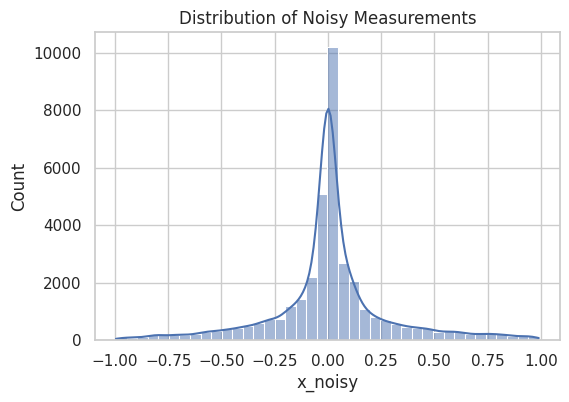

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["x_noisy"], bins=40, kde=True)
plt.title("Distribution of Noisy Measurements")
plt.show()


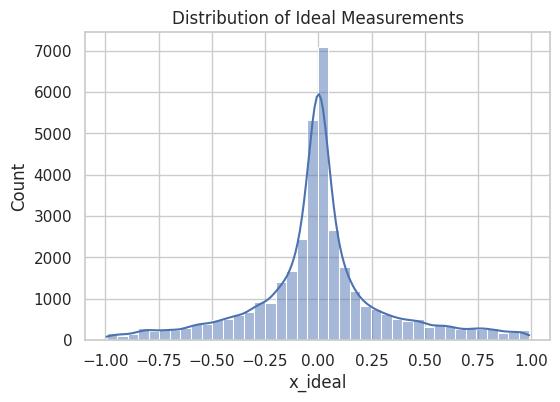

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["x_ideal"], bins=40, kde=True)
plt.title("Distribution of Ideal Measurements")
plt.show()


6️⃣ Error Analysis (MOST IMPORTANT FOR QEM)

In [ ]:
#Define Error
df["absolute_error"] = np.abs(df["x_ideal"] - df["x_noisy"])
df["signed_error"] = df["x_ideal"] - df["x_noisy"]


In [ ]:
df[["absolute_error", "signed_error"]].describe()


,absolute_error,signed_error
count,36450.000000,36450.000000
mean,0.046858,-0.006965
std,0.103880,0.113747
min,0.000000,-0.965093
25%,0.000000,-0.008540
50%,0.003241,0.000000
75%,0.038328,0.000455
max,0.975414,0.975414


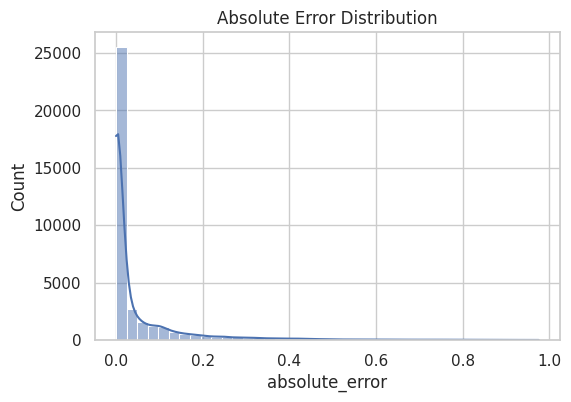

In [ ]:
#Error Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["absolute_error"], bins=40, kde=True)
plt.title("Absolute Error Distribution")
plt.show()


7️⃣ Noise Type Impact (Critical Insight)

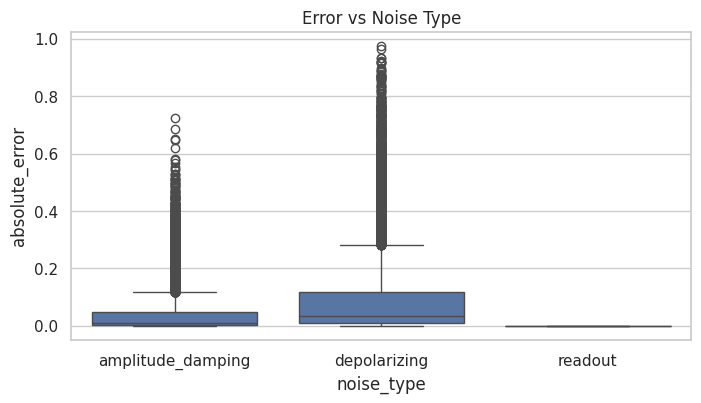

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x="noise_type",
    y="absolute_error"
)
plt.title("Error vs Noise Type")
plt.show()


8️⃣ Error Rate vs Error

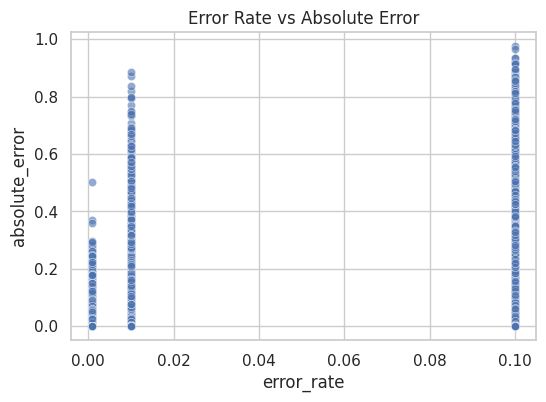

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="error_rate",
    y="absolute_error",
    alpha=0.6
)
plt.title("Error Rate vs Absolute Error")
plt.show()


9️⃣ Circuit Depth & Qubits Effect

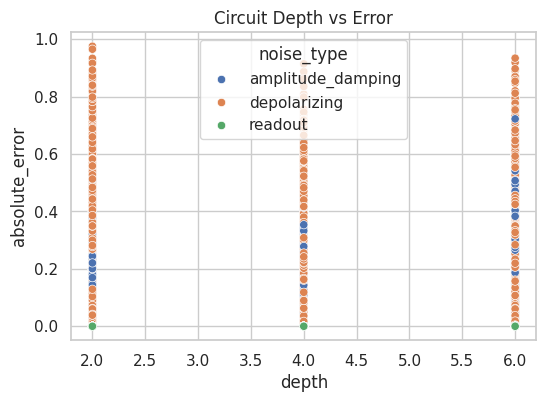

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="depth",
    y="absolute_error",
    hue="noise_type"
)
plt.title("Circuit Depth vs Error")
plt.show()


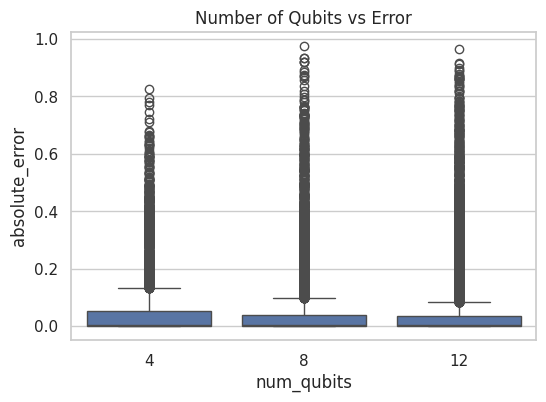

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="num_qubits",
    y="absolute_error"
)
plt.title("Number of Qubits vs Error")
plt.show()


🔟 Entanglement Structure Analysis

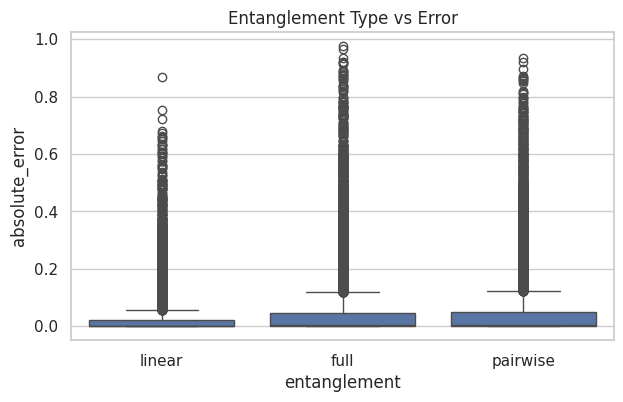

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x="entanglement",
    y="absolute_error"
)
plt.title("Entanglement Type vs Error")
plt.show()


1️⃣1️⃣ Observable-Wise Error Behavior

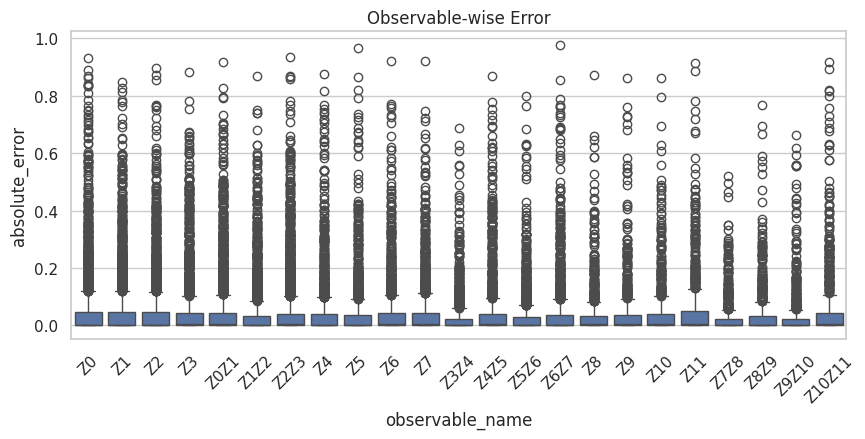

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="observable_name",
    y="absolute_error"
)
plt.xticks(rotation=45)
plt.title("Observable-wise Error")
plt.show()


1️⃣2️⃣ Correlation Matrix (Numerical)

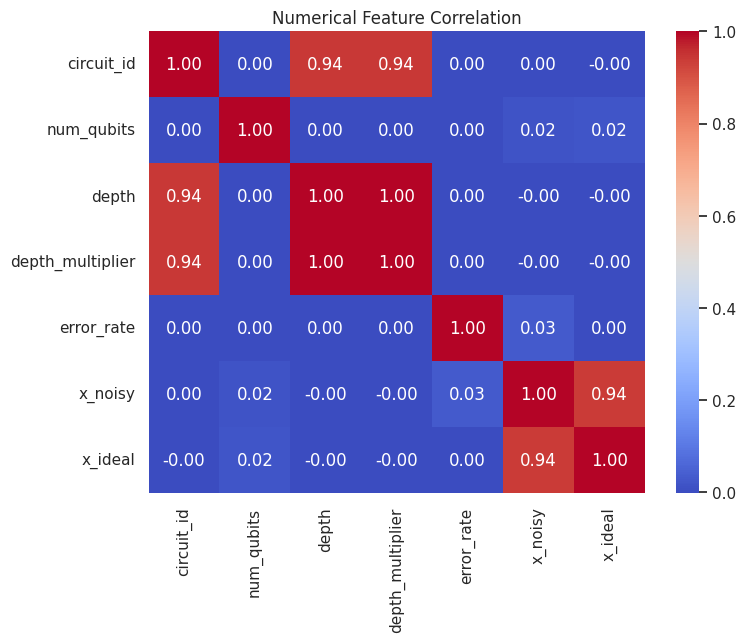

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Numerical Feature Correlation")
plt.show()


1️⃣3️⃣ Grouped Statistics (Very Useful for Papers)

In [ ]:
df.groupby("noise_type")["absolute_error"].mean()


,absolute_error
noise_type,
amplitude_damping,0.043357
depolarizing,0.097217
readout,0.000000


In [ ]:
df.groupby("entanglement")["absolute_error"].mean()


,absolute_error
entanglement,
full,0.052169
linear,0.030923
pairwise,0.057483


In [ ]:
df.groupby("observable_name")["absolute_error"].mean()


,absolute_error
observable_name,
Z0,0.056816
Z0Z1,0.052713
Z1,0.052407
Z10,0.047064
Z10Z11,0.061421
Z11,0.057921
Z1Z2,0.042969
Z2,0.050195
Z2Z3,0.054023


1️⃣4️⃣ Feature Importance Preview (Quick ML Probe)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_ml = df.copy()
df_ml = df_ml.drop(columns=["circuit_id"])
for col in cat_cols:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

X = df_ml.drop(columns=["x_ideal"])
y = df_ml["x_ideal"]

model = RandomForestRegressor(n_estimators=200, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


,0
x_noisy,0.879817
signed_error,0.097198
absolute_error,0.022855
observable_name,0.000053
entanglement,0.000018
num_qubits,0.000017
depth,0.000014
depth_multiplier,0.000013
error_rate,0.000007
noise_type,0.000007


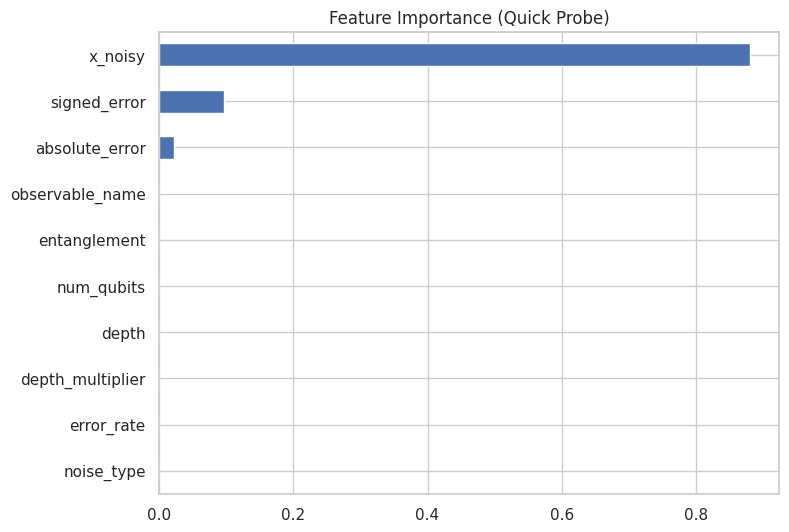

In [ ]:
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Quick Probe)")
plt.show()


1️⃣5️⃣ QEM Performance Baseline

In [ ]:
#How much error reduction is needed?
baseline_mae = np.mean(np.abs(df["x_ideal"] - df["x_noisy"]))
print("Baseline MAE (No Mitigation):", baseline_mae)


Baseline MAE (No Mitigation): 0.046858032153495724


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model_error = np.mean(np.abs(y_test - y_pred))
model_error

np.float64(0.0013316695484986174)

In [ ]:
enhance_percentage = baseline_mae/model_error
enhance_percentage

np.float64(35.18743235236214)

Benchmarking

In [ ]:
df.to_csv("/content/benchmarking_dataset.csv", index=False)

In [ ]:
benchmark_df = pd.read_csv("/content/benchmarking_dataset.csv")
benchmark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36450 entries, 0 to 36449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   circuit_id        36450 non-null  int64  
 1   num_qubits        36450 non-null  int64  
 2   depth             36450 non-null  int64  
 3   depth_multiplier  36450 non-null  int64  
 4   entanglement      36450 non-null  object 
 5   noise_type        36450 non-null  object 
 6   error_rate        36450 non-null  float64
 7   observable_name   36450 non-null  object 
 8   x_noisy           36450 non-null  float64
 9   x_ideal           36450 non-null  float64
 10  absolute_error    36450 non-null  float64
 11  signed_error      36450 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.3+ MB


In [ ]:
benchmark = benchmark_df.copy()
y_benchmark = benchmark["x_ideal"]
benchmark["absolute_error"] = np.abs(benchmark["x_ideal"] - benchmark["x_noisy"])
benchmark["signed_error"] = benchmark["x_ideal"] - benchmark["x_noisy"]
for col in cat_cols:
    benchmark[col] = LabelEncoder().fit_transform(benchmark[col])
benchmark.drop(columns = ["x_ideal"],inplace = True)
benchmark

,circuit_id,num_qubits,depth,depth_multiplier,entanglement,noise_type,error_rate,observable_name,x_noisy,absolute_error,signed_error
0,0,4,2,1,1,0,0.001,0,0.015463,0.000857,-0.000857
1,0,4,2,1,1,0,0.001,2,-0.014410,0.001165,-0.001165
2,0,4,2,1,1,0,0.001,7,0.026975,0.000780,-0.000780
3,0,4,2,1,1,0,0.001,9,-0.278298,0.000591,-0.000591
4,0,4,2,1,1,0,0.001,1,-0.317080,0.000370,-0.000370
...,...,...,...,...,...,...,...,...,...,...,...
36445,89,12,6,3,2,2,0.100,16,-0.238984,0.000000,0.000000
36446,89,12,6,3,2,2,0.100,18,-0.018341,0.000000,0.000000
36447,89,12,6,3,2,2,0.100,20,-0.166678,0.000000,0.000000
36448,89,12,6,3,2,2,0.100,22,-0.004459,0.000000,0.000000


In [ ]:
benchmark_for_prediction = benchmark.drop(columns=["circuit_id"])
y_mitigated_benchmark = model.predict(benchmark_for_prediction)

In [ ]:
mae_benchmark = np.mean(np.abs(y_benchmark - y_mitigated_benchmark))
mae_benchmark

np.float64(0.0006743873796971296)

In [ ]:
E_base = np.mean(np.abs(y_benchmark - benchmark["x_noisy"]))
improvement_ratio = E_base/mae_benchmark
improvement_ratio

np.float64(69.48236809315719)

In [ ]:
benchmark["x_ideal"] = y_benchmark
benchmark["x_mitigated"] = y_mitigated_benchmark
benchmark["err_model"] = np.abs(benchmark["x_ideal"] - benchmark["x_mitigated"])
benchmark["improvement ratio"] = benchmark["absolute_error"]/benchmark["err_model"]

In [ ]:
depth_stats = (
    benchmark
    .groupby("depth")[["absolute_error", "err_model"]]
    .mean()
    .reset_index()
)


In [ ]:
depth_stats

,depth,absolute_error,err_model
0,2,0.048888,0.000890
1,4,0.044470,0.000581
2,6,0.047217,0.000553


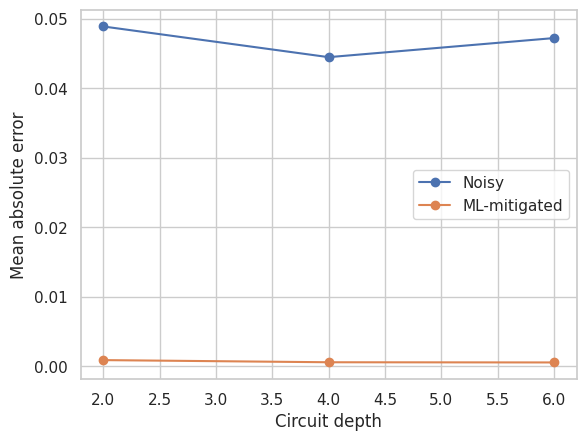

In [ ]:
import matplotlib.pyplot as plt

plt.plot(depth_stats["depth"], depth_stats["absolute_error"], "o-", label="Noisy")
plt.plot(depth_stats["depth"], depth_stats["err_model"], "o-", label="ML-mitigated")

plt.xlabel("Circuit depth")
plt.ylabel("Mean absolute error")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_ml["x_ideal"] = y
df_ml["x_mitigated"] = model.predict(X)
df_ml["err_model"] = np.abs(df_ml["x_ideal"] - df_ml["x_mitigated"])
df_ml["improvement ratio"] = df_ml["absolute_error"]/df_ml["err_model"]

In [ ]:
depth_stats_original = (
    df_ml
    .groupby("depth")[["absolute_error", "err_model"]]
    .mean()
    .reset_index()
)


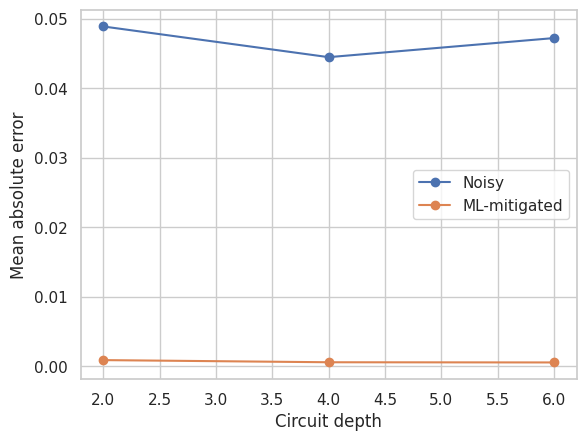

In [ ]:
import matplotlib.pyplot as plt

plt.plot(depth_stats_original["depth"], depth_stats_original["absolute_error"], "o-", label="Noisy")
plt.plot(depth_stats_original["depth"], depth_stats_original["err_model"], "o-", label="ML-mitigated")

plt.xlabel("Circuit depth")
plt.ylabel("Mean absolute error")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
R_depth = (
    benchmark
    .groupby("depth")["improvement ratio"]
    .mean()
    .reset_index()
)

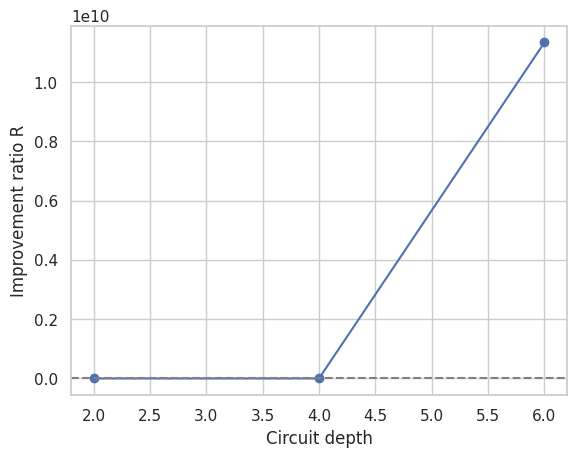

In [ ]:
plt.plot(R_depth["depth"], R_depth["improvement ratio"], "o-")
plt.axhline(1.0, linestyle="--", color="gray")
plt.xlabel("Circuit depth")
plt.ylabel("Improvement ratio R")
plt.grid(True)
plt.show()


A. Error Rate vs Error (LOG SCALE)

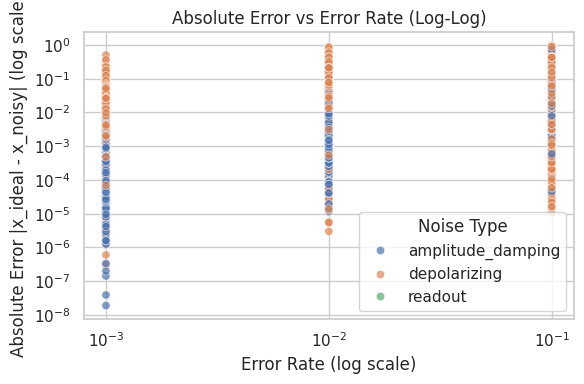

In [ ]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=df,
    x="error_rate",
    y="absolute_error",
    hue="noise_type",
    alpha=0.7
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Error Rate (log scale)")
plt.ylabel("Absolute Error |x_ideal - x_noisy| (log scale)")
plt.title("Absolute Error vs Error Rate (Log-Log)")

plt.legend(title="Noise Type")
plt.tight_layout()
plt.show()


B. Observable-Wise Error WITH Error Bars

In [ ]:
#Step 1: Compute mean + std
grouped = (
    df.groupby("observable_name")["absolute_error"]
      .agg(["mean", "std"])
      .reset_index()
)


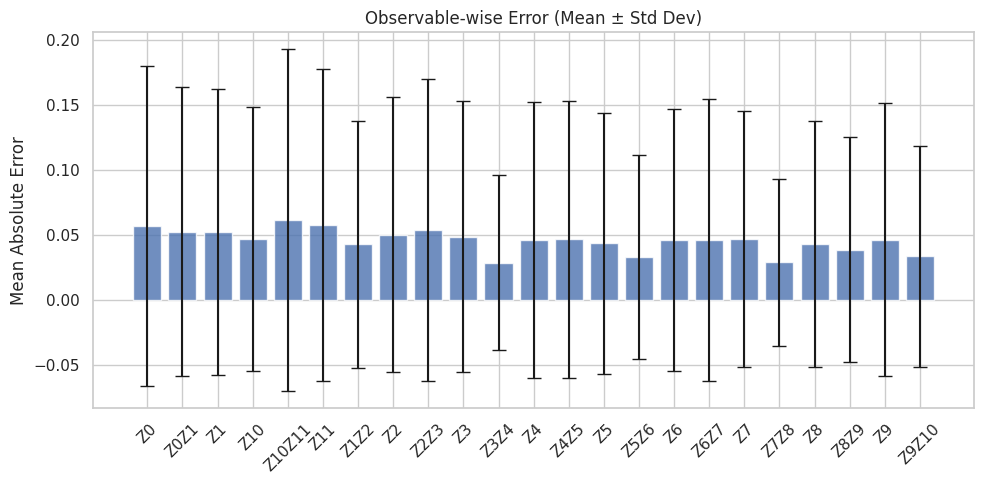

In [ ]:
#Step 2: Plot with error bars
plt.figure(figsize=(10,5))

plt.bar(
    grouped["observable_name"],
    grouped["mean"],
    yerr=grouped["std"],
    capsize=5,
    alpha=0.8
)

plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error")
plt.title("Observable-wise Error (Mean ± Std Dev)")

plt.tight_layout()
plt.show()


C. x_noisy vs x_ideal (Drift Visualization)

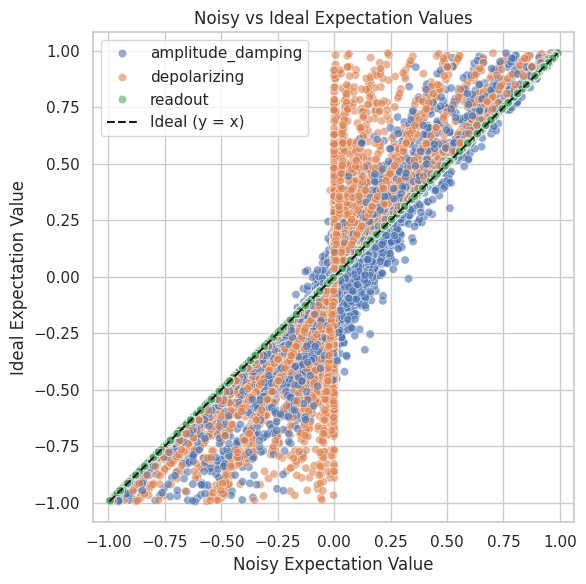

In [ ]:
plt.figure(figsize=(6,6))

sns.scatterplot(
    data=df,
    x="x_noisy",
    y="x_ideal",
    hue="noise_type",
    alpha=0.6
)

# Reference line y = x
min_val = min(df["x_noisy"].min(), df["x_ideal"].min())
max_val = max(df["x_noisy"].max(), df["x_ideal"].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'k--',
    label="Ideal (y = x)"
)

plt.xlabel("Noisy Expectation Value")
plt.ylabel("Ideal Expectation Value")
plt.title("Noisy vs Ideal Expectation Values")

plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.show()


D. (Optional but Strong) Error Distribution by Noise Type

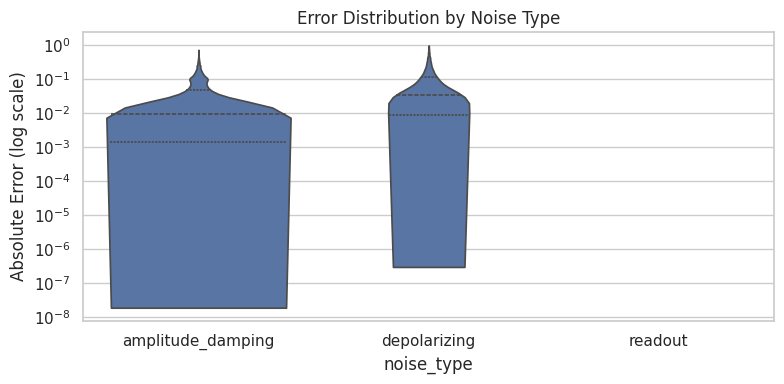

In [ ]:
plt.figure(figsize=(8,4))

sns.violinplot(
    data=df,
    x="noise_type",
    y="absolute_error",
    inner="quartile",
    cut=0
)

plt.yscale("log")
plt.ylabel("Absolute Error (log scale)")
plt.title("Error Distribution by Noise Type")

plt.tight_layout()
plt.show()
